In [1]:
'''
Author information:
Joey R. Muffoletto
University of Texas at Austin
Autonomous Systems Group
jrmuff@utexas.edu
'''

In [15]:
'''
imports
'''
import sys
import os
sys.path.insert(0, os.path.abspath('C:\\Users\\Joey\\PycharmProjects\\Automata-Testing'))
import copy
import optimization_functions
import graph_manager
import graph_test_methods
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz 2.44.1/bin'

In [16]:
'''
Globals/System variables
'''

NUM_TOWERS = 5 
RUNS_PER_DATA_POINT = 1
LINES_PER_SYSTEM = 1000 # how many lines of data to parse for tower matches

#DESTINATIONS = ['K'+ str(i) for i in range(1, NUM_TOWERS+1)] #randomize this?
# DESTINATIONS = dict()
# for i in range(1, NUM_TOWERS+1):
#     DESTINATIONS['K' + str(i)] = []

# DATA indicies
EVENT_TIME_INDEX = 0
ORIGIN_INDEX = 1
DESTINATION_INDEX = 2
DEPARTURE_TIME_INDEX = 3
NUM_PASSENGERS_INDEX = 4



In [4]:
'''
Read NASA data
'''
import csv
import copy

DESTINATIONS = {'K4' : [], 'K6' : [], 'K10' : [], 'K11' : [], 'K14': []}

print(DESTINATIONS)

data = open('data/scn_UAM_testNewVT.trp', 'r')


reader = csv.reader(data)
counter = 0

destinations_per_interval = [copy.deepcopy(DESTINATIONS)]
current_index = 0
for row in reader:
    if counter == LINES_PER_SYSTEM:
        destinations_per_interval.append(copy.deepcopy(DESTINATIONS))
        current_index += 1
        counter = 0
        
    counter += 1     
    eventTime, origin, destination, desiredDepartureTime, numPassengers = row
    
    if destination in DESTINATIONS.keys():
        destinations_per_interval[current_index][destination].append(desiredDepartureTime)
        
print(destinations_per_interval)
for row in destinations_per_interval:
    for key in row.keys():
        print(len(row[key]))
# for key in DESTINATIONS.keys():
#     print(len(DESTINATIONS[key]))


{'K4': [], 'K6': [], 'K10': [], 'K11': [], 'K14': []}
[{'K4': [], 'K6': [], 'K10': [], 'K11': [], 'K14': []}, {'K4': [], 'K6': ['22069.0', '22140.0', '22254.0'], 'K10': [], 'K11': [], 'K14': []}, {'K4': ['22344.0'], 'K6': ['22371.0', '22390.0', '22430.0', '22500.0', '22509.0'], 'K10': [], 'K11': [], 'K14': []}, {'K4': ['22680.0', '22791.0'], 'K6': ['22612.0', '22781.0'], 'K10': ['22717.0', '22719.0', '22788.0'], 'K11': ['22690.0'], 'K14': []}, {'K4': [], 'K6': ['22820.0', '22917.0', '22936.0', '23021.0'], 'K10': [], 'K11': ['22918.0'], 'K14': ['23072.0']}, {'K4': [], 'K6': ['23354.0'], 'K10': ['23305.0'], 'K11': [], 'K14': []}, {'K4': [], 'K6': ['23369.0', '23473.0', '23490.0', '23540.0', '23540.0'], 'K10': [], 'K11': [], 'K14': ['23563.0', '23625.0']}, {'K4': ['23760.0'], 'K6': ['23639.0', '23717.0'], 'K10': ['23652.0', '23669.0', '23707.0'], 'K11': [], 'K14': []}, {'K4': ['23914.0'], 'K6': ['23919.0', '23947.0', '23987.0', '24102.0'], 'K10': ['23956.0', '23962.0', '24017.0'], 'K11': 

In [5]:
'''
Create a system per interval

current choices:
    - requests have no preference
    - one port per tower with 3 capacity
    - request time is equal to index + 1, capped at 5. for 7 requests = [1,2,3,4,5,5,5]
    - request vec size is capped to 7
'''


system_per_interval = []

TIME_CAP = 3
REQ_CAP = 9

for row in destinations_per_interval:
    system = []
    for key in row.keys():
        #graph_manager.return_tower_specific(port_dict, req_per_step, request_vec, time_req)
        port_dict = {'0' : 3}
        req_per_step = 1
        request_vec = []
        for index, i in enumerate(row[key]):
            if index >= REQ_CAP:
                break
            request_vec.append('no_pref')
            
        time_vec = []
        for i in range(1, len(request_vec)+1):
            if(i > TIME_CAP):
                time_vec.append(TIME_CAP)
            else:
                time_vec.append(i)

        print(request_vec)
        print(time_vec)
        assert(len(request_vec) == len(time_vec))
        print("new tower")
        tower = graph_manager.return_tower_specific(port_dict, req_per_step, request_vec, time_vec)
        system.append(tower)
    assert(len(system) == len(row.keys()))
    print("new system")
    system_per_interval.append(system)


[]
[]
new tower
[]
[]
new tower
[]
[]
new tower
[]
[]
new tower
[]
[]
new tower
new system
[]
[]
new tower
['no_pref', 'no_pref', 'no_pref']
[1, 2, 3]
new tower
[]
[]
new tower
[]
[]
new tower
[]
[]
new tower
new system
['no_pref']
[1]
new tower
['no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref']
[1, 2, 3, 3, 3]
new tower
[]
[]
new tower
[]
[]
new tower
[]
[]
new tower
new system
['no_pref', 'no_pref']
[1, 2]
new tower
['no_pref', 'no_pref']
[1, 2]
new tower
['no_pref', 'no_pref', 'no_pref']
[1, 2, 3]
new tower
['no_pref']
[1]
new tower
[]
[]
new tower
new system
[]
[]
new tower
['no_pref', 'no_pref', 'no_pref', 'no_pref']
[1, 2, 3, 3]
new tower
[]
[]
new tower
['no_pref']
[1]
new tower
['no_pref']
[1]
new tower
new system
[]
[]
new tower
['no_pref']
[1]
new tower
['no_pref']
[1]
new tower
[]
[]
new tower
[]
[]
new tower
new system
[]
[]
new tower
['no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref']
[1, 2, 3, 3, 3]
new tower
[]
[]
new tower
[]
[]
new tower
['no_pref', 'no_pref']

In [6]:
#runtime, num_rounds, minimized_cost_vec_list,sys_timing,cost_vec_per_round = graph_manager.run_minimizing_mvp(hand_system, rollout_index=0)
'''
Extract cost_vec from each system
'''
costs_per_system = []
time_per_system = []
num_rounds_per_system = []
for system in system_per_interval:
    graph_manager.reset_globals()
    total_time, num_rounds, minimized_cost_vec, system_timings, cost_vec_per_round = graph_manager.run_minimizing_mvp(
        system,
        rollout_index=0
    )
    costs_per_system.append(cost_vec_per_round)
    time_per_system.append(system_timings)
    num_rounds_per_system.append(num_rounds)
    
    


Tower has requests :: [] and times of [] and ports of {'0': 3}
Tower has requests :: [] and times of [] and ports of {'0': 3}
Tower has requests :: [] and times of [] and ports of {'0': 3}
Tower has requests :: [] and times of [] and ports of {'0': 3}
Tower has requests :: [] and times of [] and ports of {'0': 3}
Optimal cost: [-1, -1, -1]
Optimal cost: [-1, -1, -1]
Optimal cost: [-1, -1, -1]
Optimal cost: [-1, -1, -1]
Optimal cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 0, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 0, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 0, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 0, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]
accepting tower in

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]

 new round - completed in time 0.14896680000000018
	round 2 breakdown :: 
	 tower 0 took 0.006142799999999671 to find most expensive request and took 0.016448000000000018 to synthesize with published request
	 tower 1 took 0.00713790000000003 to find most expensive request and took 0.07438469999999997 to synthesize with published request


accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 0, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 0, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]

 new round - completed in time 0.07687640000000018
	round 0 breakdown :: 
	 tower 0 took 0.0017447999999999908 to find most expensive request and took 0.005902800000000319 to synthesize with published request
	 tower 1 took 0.002751799999999971 to find most expensive request and took 0.016504600000000202 to synthesize with published request
	 tower 2 took 2.4000000000690136e-06 to find most expensive request and took 0.01864230000000111 to synthesize with published request
	 tower 3 took 2.2999999997885823e-06 to find most expensive request and took 0.013554699999999809 to synthesize with published request
	 tower 4 took 2.2999999997885823e-06 to find most expensive request and took 0.014584099999999545 to synthesize with p


violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.004519099999999998 ,published request synthesis cumulative : 0.00837930000000009
tower 1 expensive request cumulative : 0.009657699999999991 ,published request synthesis cumulative : 0.03733730000000035
tower 2 expensive request cumulative : 0.024982099999999896 ,published request synthesis cumulative : 0.07998839999999996
tower 3 expensive request cumulative : 5.699999999997374e-06 ,published request synthesis cumulative : 0.013879999999999892
tower 4 expensive request cumulative : 2.600000000185787e-06 ,published request synthesis cumulative : 0.013832299999999798
Tower has requests :: ['no_pref'] and times of [1] and ports of {'0': 3}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [1, 2, 3, 3] and ports of {'0': 3}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref'] and times of [1, 2, 3] and ports of {'0': 3}
Tower has requests :: [] and times of [] and ports o

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [0, 0, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [0, 0, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]

 new round - completed in time 0.21364179999999955
	round 2 breakdown :: 
	 tower 0 took 3.000000000419334e-06 to find most expensive request and took 0.06209760000000131 to synthesize with published request
	 tower 1 took 0.007391300000000101 to find most expensive request and took 0.07105980000000134 to synthesize with published request
	 tower 2 took 0.0003444999999997478 to find most expensive request and took 0.03722549999999902 to synthesize with published request
	

Optimal cost: [1, 2, 1]
Optimal cost: [1, 2, 1]
Optimal cost: [0, 0, 1]
Optimal cost: [0, 0, 1]
Optimal cost: [0, 0, 1]
accepting tower index 2
lowest_new_cost [0, 2, 2]
cost of accepting request list :: [[1, 2, 2], [0, 2, 2], [0, 2, 2], [0, 2, 2]]

 new round - completed in time 0.3222940000000003
	round 2 breakdown :: 
	 tower 0 took 0.17422249999999995 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 2.19999999995224e-06 to find most expensive request and took 0.06187499999999968 to synthesize with published request
	 tower 2 took 2.099999999671809e-06 to find most expensive request and took 0.018347099999999728 to synthesize with published request
	 tower 3 took 1.8000000006068717e-06 to find most expensive request and took 0.01784169999999996 to synthesize with published request
	 tower 4 took 0.0056282999999996974 to find most expensive request and took 0.01592820000000028 to synthesize with published request

Tow

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 2, 2], [0, 2, 2], [0, 0, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 2, 2], [0, 2, 2], [0, 0, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]

 new round - completed in time 0.1933510000000016
	round 1 breakdown :: 
	 tower 0 took 0.0064419000000004445 to find most expensive request and took 0.03641449999999935 to synthesize with published request
	 tower 1 took 0.013200699999998733 to find most expensive request and took 0.08616190000000046 to synthesize with published request
	 tower 2 took 2.1999999990640617e-06 to find most expensive request and took 0.017256800000000183 to synthesize with published request
	 tower 3 took 2.9000000001389026e-06 to find most expensive request and took 0.01729550000000124 to synthesize with published req

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 0, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]

 new round - completed in time 0.1528855
	round 1 breakdown :: 
	 tower 0 took 0.0002271000000000356 to find most expensive request and took 0.007446500000000356 to synthesize with published request
	 tower 1 took 0.013763799999999549 to find most expensive request and took 0.08797429999999729 to synthesize with published request
	 tower 2 took 1.5999999991578306e-06 to find most expensive request and took 0.013710500000001957 to synthesize with published request
	 

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 2, 2], [0, 2, 2], [0, 0, 2], [0, 2, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 2, 2], [0, 2, 2], [0, 2, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [0, 0, 2], [0, 2, 2]]

 new round - completed in time 0.322222
	round 2 breakdown :: 
	 tower 0 took 0.0010247999999997148 to find most expensive request and took 0.038304599999998246 to synthesize with published request
	 tower 1 took 0.007225399999999382 to find most expensive request and took 0.06883850000000002 to synthesize with published request
	 tower 2 took 2.000000000279556e-06 to find most expensive request and took 0.07912860000000244 to synthesize with published request
	 tower 3 took 1.900000000887303e-06 to find most expensive request and took 0.014723800000002285 to synthesize with published request
	 towe

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [2, 2, 2], [0, 0, 2], [0, 2, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [0, 0, 2], [0, 2, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [0, 0, 2], [0, 2, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [3, 2, 2], [0, 2, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [2, 2, 2], [0, 0, 2]]

 new round - completed in time 0.2922755000000006
	round 4 breakdown :: 
	 tower 0 took 3.1000000006997652e-06 to find most expensive request and took 0.07821169999999711 to synthesize with published request
	 tower 1 took 2.3999999996249244e-06 to find most expensive request and took 0.06817129999999949 to synthesize with published request
	 towe

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [0, 2, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [0, 2, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [3, 2, 2], [0, 2, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [0, 2, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [3, 2, 2], [0, 2, 2], [0, 2, 2]]

 new round - completed in time 0.2880105000000004
	round 6 breakdown :: 
	 tower 0 took 0.0017972999999997796 to find most expensive request and took 0.06511210000000034 to synthesize with published request
	 tower 1 took 2.4999999990171773e-06 to find most expensive request and took 0.057392700000001184 to synthesize with published request
	 towe

 new round - completed in time 0.07099710000000137
	round 5 breakdown :: 
	 tower 0 took 0.0077238000000008356 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 1.900000000887303e-06 to find most expensive request and took 0.018783599999999012 to synthesize with published request
	 tower 2 took 2.099999999671809e-06 to find most expensive request and took 0.016144300000000555 to synthesize with published request
	 tower 3 took 0.0017047999999988406 to find most expensive request and took 0.0122757 to synthesize with published request
	 tower 4 took 2.8000000007466497e-06 to find most expensive request and took 0.010528899999998842 to synthesize with published request

Tower has requests :: ['no_pref', 'no_pref', 'no_pref'] and times of [3, 3, 3] and ports of {'0': 3}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref'] and times of [1, 2, 1] and ports of {'0': 3}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref']

accepting tower index 3
lowest_new_cost [0, 0, 2]
cost of accepting request list :: [[1, 2, 2], [0, 2, 2], [0, 0, 2], [0, 0, 2]]

 new round - completed in time 0.2686290000000007
	round 3 breakdown :: 
	 tower 0 took 0.07749339999999805 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 2.59999999840943e-06 to find most expensive request and took 0.13942280000000196 to synthesize with published request
	 tower 2 took 0.007181599999999122 to find most expensive request and took 0.019768700000000194 to synthesize with published request
	 tower 3 took 3.5999999994373866e-06 to find most expensive request and took 0.003952999999999207 to synthesize with published request
	 tower 4 took 1.900000000887303e-06 to find most expensive request and took 0.007168700000001138 to synthesize with published request

Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [3, 3, 3, 3, 3] and ports of {'

accepting tower index -1
lowest_new_cost [0, 2, 1]
cost of accepting request list :: [[2, 2, 2], [2, 2, 2], [0, 2, 2], [0, 2, 2]]
accepting tower index -1
lowest_new_cost [0, 2, 1]
cost of accepting request list :: [[2, 2, 2], [2, 2, 2], [0, 2, 2], [0, 2, 2]]
accepting tower index -1
lowest_new_cost [0, 2, 1]
cost of accepting request list :: [[2, 2, 2], [2, 2, 2], [0, 2, 2], [0, 2, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 2, 2], [2, 2, 2], [2, 2, 2], [0, 2, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 2, 2], [2, 2, 2], [2, 2, 2], [0, 2, 2]]

 new round - completed in time 0.48913809999999813
	round 9 breakdown :: 
	 tower 0 took 3.7000000006059963e-06 to find most expensive request and took 0.09617679999999851 to synthesize with published request
	 tower 1 took 3.1000000006997652e-06 to find most expensive request and took 0.09161849999999916 to synthesize with published request
	 tow

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [0, 2, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [0, 2, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [3, 2, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [3, 2, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [0, 2, 2], [0, 2, 2]]

 new round - completed in time 0.3371393999999981
	round 6 breakdown :: 
	 tower 0 took 4.300000000512227e-06 to find most expensive request and took 0.06129699999999616 to synthesize with published request
	 tower 1 took 3.1999999983156613e-06 to find most expensive request and took 0.06125649999999894 to synthesize with published request
	 tower

Optimal cost: [0, 0, 1]
Optimal cost: [0, 0, 1]
Optimal cost: [0, 0, 1]
Optimal cost: [0, 0, 1]
Optimal cost: [0, 0, 1]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [0, 2, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [0, 2, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [0, 2, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [0, 2, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [0, 2, 2], [0, 2, 2]]

 new round - completed in time 0.3686109000000002
	round 5 breakdown :: 
	 tower 0 took 0.008859099999998676 to find most expensive request and took 0.07088900000000109 to synthesize with published request
	 tower 1 took 2.299999

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 2, 2], [0, 2, 2], [0, 0, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 2, 2], [0, 2, 2], [0, 0, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]

 new round - completed in time 0.1980518999999994
	round 4 breakdown :: 
	 tower 0 took 2.69999999957804e-06 to find most expensive request and took 0.043068300000001614 to synthesize with published request
	 tower 1 took 0.0017257999999991114 to find most expensive request and took 0.0666961999999991 to synthesize with published request
	 tower 2 took 0.00028329999999954225 to find most expensive request and took 0.04570190000000096 to synthesize with published request
	 tower 3 took 2.799999997193936e-06 to find most expensive request and took 0.021883000000006092 to synthesize with published requ

 new round - completed in time 0.07907419999999732
	round 0 breakdown :: 
	 tower 0 took 0.05648839999999922 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 0.0014785999999986643 to find most expensive request and took 0.0032016000000005818 to synthesize with published request
	 tower 2 took 3.1000000006997652e-06 to find most expensive request and took 0.003276800000001856 to synthesize with published request
	 tower 3 took 0.0036786999999982584 to find most expensive request and took 0.004318800000000067 to synthesize with published request
	 tower 4 took 2.4999999972408204e-06 to find most expensive request and took 0.0039386999999990735 to synthesize with published request

Tower has requests :: ['no_pref', 'no_pref', 'no_pref'] and times of [2, 3, 3] and ports of {'0': 3}
Tower has requests :: ['no_pref'] and times of [1] and ports of {'0': 3}
Tower has requests :: [] and times of [] and ports of {'0': 3}
Tower ha

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 0, 2], [0, 0, 2], [0, 2, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 0, 2], [0, 0, 2], [0, 2, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 0, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 0, 2], [0, 0, 2], [0, 0, 2], [0, 2, 2]]

 new round - completed in time 0.2196360999999989
	round 0 breakdown :: 
	 tower 0 took 0.004322800000000626 to find most expensive request and took 0.016386499999999415 to synthesize with published request
	 tower 1 took 2.9000000019152594e-06 to find most expensive request and took 0.052549700000000144 to synthesize with published request
	 tower 2 took 2.3999999996249244e-06 to find most expensive request and took 0.017129900000000475 to synthesize with published request


lowest_new_cost [0, 0, 2]
cost of accepting request list :: [[0, 0, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]

 new round - completed in time 0.08544960000000046
	round 0 breakdown :: 
	 tower 0 took 0.0041882999999991455 to find most expensive request and took 0.003943800000001829 to synthesize with published request
	 tower 1 took 4.9999999980343546e-06 to find most expensive request and took 0.0033956999999986692 to synthesize with published request
	 tower 2 took 2.2999999984563146e-06 to find most expensive request and took 0.0031223999999987484 to synthesize with published request
	 tower 3 took 0.011039799999998934 to find most expensive request and took 0.008787900000001514 to synthesize with published request
	 tower 4 took 0.048025399999996665 to find most expensive request and took 0 to synthesize with published request <--- publishing tower

Tower has requests :: ['no_pref', 'no_pref'] and times of [1, 1] and ports of {'0': 3}
Tower has requests :: [] and times of [] and ports o

accepting tower index 1
lowest_new_cost [0, 0, 2]
cost of accepting request list :: [[2, 0, 2], [0, 0, 2], [2, 2, 2], [0, 0, 2]]

 new round - completed in time 0.1052546999999997
	round 1 breakdown :: 
	 tower 0 took 0.0002308999999982575 to find most expensive request and took 0.005814999999998349 to synthesize with published request
	 tower 1 took 2.8999999983625457e-06 to find most expensive request and took 0.004023699999997632 to synthesize with published request
	 tower 2 took 0.023243700000001866 to find most expensive request and took 0.0635362999999991 to synthesize with published request
	 tower 3 took 1.900000000887303e-06 to find most expensive request and took 0.0029506999999995287 to synthesize with published request
	 tower 4 took 3.899999999390502e-06 to find most expensive request and took 0 to synthesize with published request <--- publishing tower

Tower has requests :: ['no_pref', 'no_pref'] and times of [1, 1] and ports of {'0': 3}
Tower has requests :: ['no_pref'

accepting tower index 0
lowest_new_cost [0, 0, 2]
cost of accepting request list :: [[0, 0, 2], [0, 0, 2], [2, 2, 2], [0, 0, 2]]

 new round - completed in time 0.1620956999999983
	round 1 breakdown :: 
	 tower 0 took 0.0002324999999991917 to find most expensive request and took 0.007217399999998264 to synthesize with published request
	 tower 1 took 1.6999999985500835e-06 to find most expensive request and took 0.008070800000002265 to synthesize with published request
	 tower 2 took 1.4000000021496817e-06 to find most expensive request and took 0.03529900000000197 to synthesize with published request
	 tower 3 took 2.4999999972408204e-06 to find most expensive request and took 0.008241200000000504 to synthesize with published request
	 tower 4 took 0.09027499999999833 to find most expensive request and took 0 to synthesize with published request <--- publishing tower

Tower has requests :: ['no_pref', 'no_pref', 'no_pref'] and times of [1, 1, 2] and ports of {'0': 3}
Tower has request

Optimal cost: [0, 0, 1]
Optimal cost: [0, 0, 1]
Optimal cost: [0, 0, 1]
Optimal cost: [0, 0, 1]
Optimal cost: [2, 2, 1]
accepting tower index 1
lowest_new_cost [0, 0, 2]
cost of accepting request list :: [[2, 2, 2], [0, 0, 2], [0, 0, 2], [0, 0, 2]]

 new round - completed in time 0.08900159999999957
	round 1 breakdown :: 
	 tower 0 took 0.006425000000000125 to find most expensive request and took 0.014388800000002533 to synthesize with published request
	 tower 1 took 2.3999999996249244e-06 to find most expensive request and took 0.006086200000002151 to synthesize with published request
	 tower 2 took 2.9999999995311555e-06 to find most expensive request and took 0.006421899999999425 to synthesize with published request
	 tower 3 took 2.9999999995311555e-06 to find most expensive request and took 0.0051653999999992095 to synthesize with published request
	 tower 4 took 0.04439739999999759 to find most expensive request and took 0 to synthesize with published request <--- publishing tow

In [7]:
'''
data buffer
'''
cost_buffer = copy.deepcopy(costs_per_system)
time_buffer = copy.deepcopy(time_per_system)
num_rounds_buffer = copy.deepcopy(num_rounds_per_system)


In [8]:
'''
formatting data
'''
level_0_cost_per_round_per_system = []
level_1_cost_per_round_per_system = []
for system_cost in cost_buffer:
    level_0_cost_per_round = list()
    level_1_cost_per_round = list()
    for round_index in range(len(system_cost)):
        level_0_cost_per_round.append(0)
        level_1_cost_per_round.append(0)    
        for vec in system_cost[round_index]:
            if vec[0] < 0:
                continue
            level_0_cost_per_round[round_index] += vec[0]
            level_1_cost_per_round[round_index] += vec[1]
    level_0_cost_per_round_per_system.append(level_0_cost_per_round)
    level_1_cost_per_round_per_system.append(level_1_cost_per_round)

c:\users\joey\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


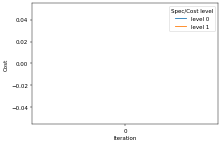

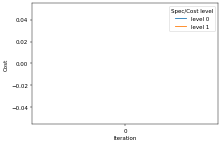

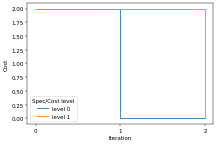

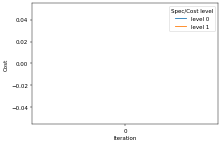

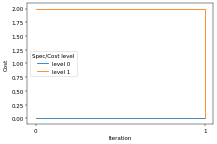

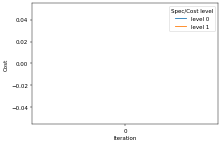

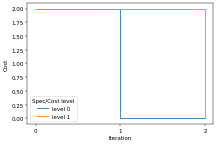

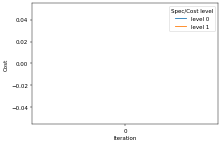

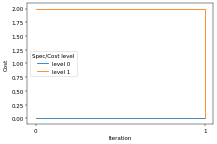

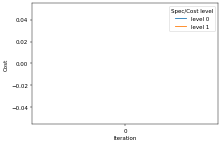

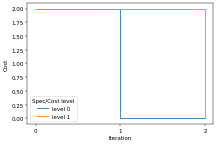

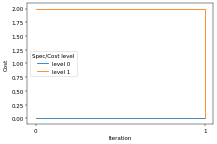

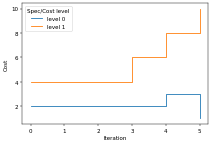

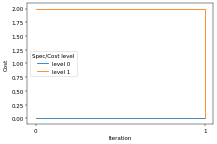

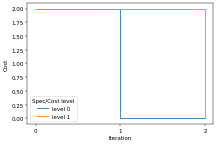

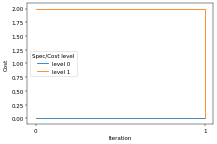

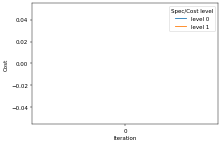

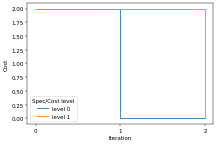

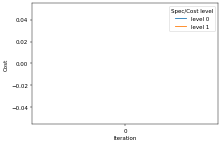

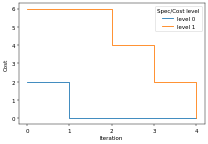

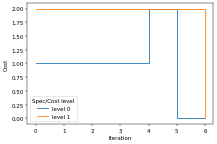

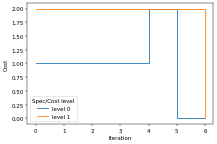

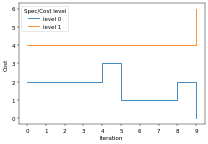

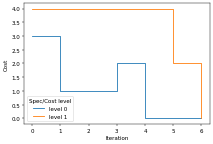

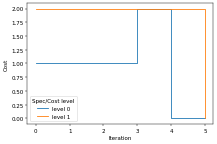

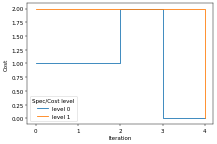

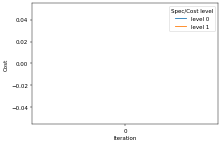

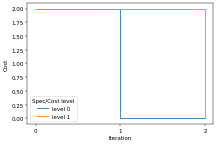

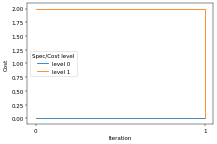

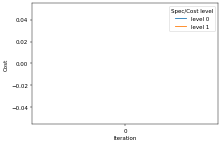

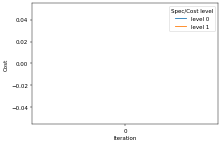

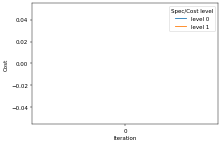

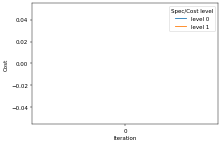

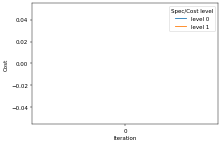

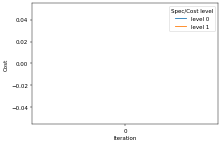

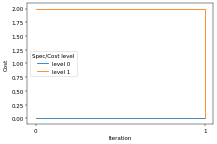

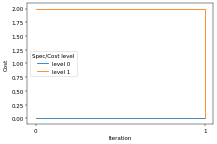

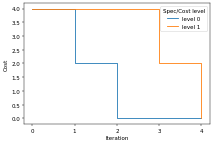

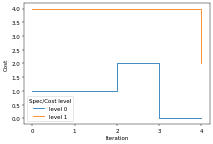

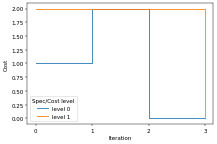

In [9]:
'''
graphing
'''
for index in range(len(level_0_cost_per_round_per_system)):
    level_0_cost_per_round = level_0_cost_per_round_per_system[index]
    level_1_cost_per_round = level_1_cost_per_round_per_system[index]
    plt.figure(dpi=40)
    x_axis = [i for i in range(num_rounds_buffer[index])]
    plt.step(x_axis, level_0_cost_per_round, label="level 0", where="post")
    plt.step(x_axis, level_1_cost_per_round, label="level 1",where="post")
    plt.xticks(x_axis)
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.legend(title="Spec/Cost level")
    plt.savefig('data\\NFM\\cost_vs_iteration_' + str(index) + '.png',dpi=216)


In [18]:
'''
isolating system 13 (index = 12)
'''
import graph_manager as gm
gm.reset_globals()
gm.run_minimizing_mvp(system_per_interval[12], rollout_index=0)


Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [3, 3, 3, 3] and ports of {'0': 3}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [1, 2, 3, 3, 3, 3] and ports of {'0': 3}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [1, 2, 3, 3] and ports of {'0': 3}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [1, 2, 1, 3] and ports of {'0': 3}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [1, 2, 2, 3] and ports of {'0': 3}
Optimal cost: [0, 2, 1]
Optimal cost: [1, 2, 1]
Optimal cost: [0, 2, 1]
Optimal cost: [0, 2, 1]
Optimal cost: [0, 2, 1]
accepting tower index -1
lowest_new_cost [1, 2, 1]
cost of accepting request list :: [[2, 2, 2], [2, 2, 2], [4, 2, 2], [3, 2, 2]]
accepting tower index -1
lowest_new_cost [0, 2, 1]
cost of accepting request list :: [[1, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2]]
accepting tower i

(1.087211700001717,
 1,
 [[0, 2, 1], [1, 2, 1], [0, 2, 1], [0, 2, 1], [0, 2, 1]],
 [[[0.023458599998775753, 0.11656869999933406],
   [0.1331540999999561, 0.29979420000017853],
   [0.05004290000033507, 0.13461539999843808],
   [0.04641759999867645, 0.13053750000108266],
   [0.03337219999957597, 0.11773489999904996]]],
 [[[0, 2, 1], [1, 2, 1], [0, 2, 1], [0, 2, 1], [0, 2, 1]]])